<a href="https://colab.research.google.com/github/ramirojc/Diplodatos2020/blob/master/Intro_Curacion_Georef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion, Analisis y Curacion de Datos

## Diplodatos 2020, Mentorias
### Mentor: Ramiro Caro

## Requisitos


In [1]:
!pip install geopandas
!apt install libspatialindex-dev
!pip install rtree
!pip install osmnx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [2]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Cargar informacion


In [3]:
data_path = './drive/My Drive/BDGD/SULGIPE_46_2018-12-31_M10_20190611-1750.gdb'

In [4]:
# Carguemos la tabla de consumidores de baja tension denominada UCBT
conj = gpd.read_file(data_path, driver='FileGDB', layer='CONJ')
conj.shape, conj.columns

((6, 9), Index(['COD_ID', 'DIST', 'NOM', 'SIST_INTE', 'SIST_SUBT', 'DESCR',
        'Shape_Length', 'Shape_Area', 'geometry'],
       dtype='object'))

In [5]:
untrs = gpd.read_file(data_path, driver='FileGDB', layer='UNTRS')
untrs.shape, untrs.columns

((17, 53),
 Index(['COD_ID', 'SUB', 'BARR_1', 'BARR_2', 'BARR_3', 'PAC_1', 'PAC_2',
        'PAC_3', 'DIST', 'FAS_CON_P', 'FAS_CON_S', 'FAS_CON_T', 'SIT_ATIV',
        'TIP_UNID', 'POS', 'POT_NOM', 'POT_F01', 'POT_F02', 'PER_FER',
        'PER_TOT', 'BANC', 'DAT_CON', 'CONJ', 'MUN', 'TIP_TRAFO', 'ALOC_PERD',
        'ENES_01', 'ENES_02', 'ENES_03', 'ENES_04', 'ENES_05', 'ENES_06',
        'ENES_07', 'ENES_08', 'ENES_09', 'ENES_10', 'ENES_11', 'ENES_12',
        'ENET_01', 'ENET_02', 'ENET_03', 'ENET_04', 'ENET_05', 'ENET_06',
        'ENET_07', 'ENET_08', 'ENET_09', 'ENET_10', 'ENET_11', 'ENET_12',
        'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [87]:
untrd = gpd.read_file(data_path, driver='FileGDB', layer='UNTRD')
untrd.shape, untrd.columns

((10508, 33),
 Index(['COD_ID', 'DIST', 'PAC_1', 'PAC_2', 'PAC_3', 'FAS_CON_P', 'FAS_CON_S',
        'FAS_CON_T', 'SIT_ATIV', 'TIP_UNID', 'POS', 'ATRB_PER', 'TEN_LIN_SE',
        'CAP_ELO', 'CAP_CHA', 'TAP', 'CONF', 'POSTO', 'POT_NOM', 'PER_FER',
        'PER_TOT', 'DAT_CON', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ', 'MUN', 'BANC',
        'TIP_TRAFO', 'MRT', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [7]:
ssmt = gpd.read_file(data_path, driver='FileGDB', layer='SSDMT')
ssmt.columns, ssmt.columns

(Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

## Manejo de objetos graficos con Shapely

https://shapely.readthedocs.io/en/latest/manual.html

### Objetos geometricos basicos

In [8]:
untrs.geometry.head()

0    POINT (-42.38024 -22.28705)
1    POINT (-42.52043 -22.23040)
2    POINT (-42.68582 -22.26417)
3    POINT (-42.51374 -22.28512)
4    POINT (-42.53341 -22.27488)
Name: geometry, dtype: geometry

In [9]:
p = Point(1,0)
o = Point(0,0)

In [10]:
p.length, p.area, p.bounds, p.x, p.y

(0.0, 0.0, (1.0, 0.0, 1.0, 0.0), 1.0, 0.0)

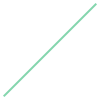

In [11]:
l = LineString([(1,1),(-1,-1)])
l

In [12]:
l.area, l.length, l.bounds, l.xy, l.centroid.xy

(0.0,
 2.8284271247461903,
 (-1.0, -1.0, 1.0, 1.0),
 (array('d', [1.0, -1.0]), array('d', [1.0, -1.0])),
 (array('d', [0.0]), array('d', [0.0])))

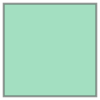

In [13]:
c = Polygon([(0,0),(0,1),(1,1),(1,0)])
c

In [14]:
c.area, c.length, c.bounds, c.centroid.xy

(1.0, 4.0, (0.0, 0.0, 1.0, 1.0), (array('d', [0.5]), array('d', [0.5])))

### Operaciones Basicas



In [15]:
p.distance(l) # Distancia del punto a linea

0.7071067811865476

In [16]:
l.contains(o) # Contiene

True

In [17]:
l.intersects(c) # Interseccion

True

### Joints Espaciales

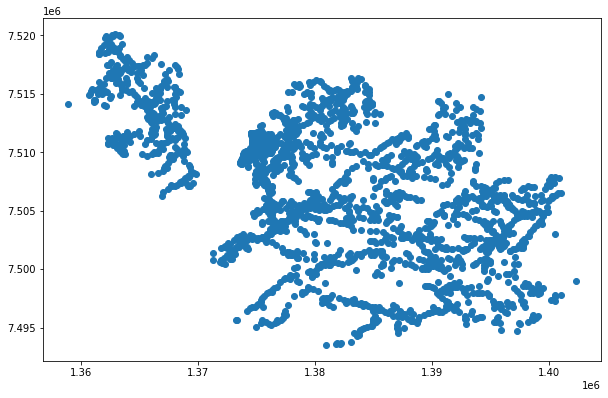

In [66]:
st = gpd.sjoin(untrd[['COD_ID','CONJ','geometry']], conj[['NOM','geometry']].iloc[:3], how='inner', op='within', lsuffix='untrs',rsuffix='conj')
st.plot(figsize=(10,10))

In [68]:
st.head()

,COD_ID,CONJ,geometry,index_conj,NOM
29,26878975,15615,POINT (1376182.173 7503439.714),2,JULIUS ARP JR.
30,26878976,15615,POINT (1378749.846 7503400.027),2,JULIUS ARP JR.
31,26878977,15615,POINT (1375495.911 7502741.477),2,JULIUS ARP JR.
32,26878978,15615,POINT (1377825.671 7504444.754),2,JULIUS ARP JR.
33,26878979,15615,POINT (1378413.454 7504500.889),2,JULIUS ARP JR.


## Sistemas de Coordenadas de Referencia, CRS
https://geopandas.org/projections.html

In [84]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [85]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'WGS 84 - EPSG 4326')

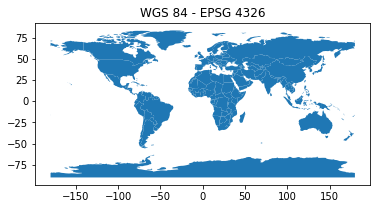

In [86]:
ax = world.plot()
ax.set_title('WGS 84 - EPSG 4326')

Text(0.5, 1.0, 'Mercator - EPSG 3395')

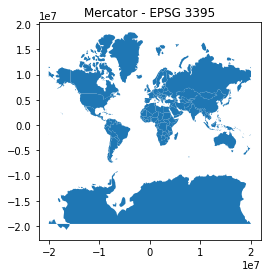

In [87]:
ax = world.to_crs('EPSG:3395').plot()
ax.set_title('Mercator - EPSG 3395')

### Converting to SIRGAS 2000, EPSG 31982

In [8]:
conj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [88]:
conj = conj.to_crs(epsg=31982)
untrs = untrs.to_crs(epsg=31982)
untrd = untrd.to_crs(epsg=31982)
ssmt = ssmt.to_crs(epsg=31982)

In [109]:
conj.crs

<Projected CRS: EPSG:31982>
Name: SIRGAS 2000 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: South America - 54°W to 48°W, S hemisphere and SIRGAS 2000 by country
- bounds: (-54.0, -54.18, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
untrd.geometry.head()

0    POINT (1950270.638 8743922.604)
1    POINT (1948936.199 8745414.730)
2    POINT (1954060.419 8720300.758)
3    POINT (1958367.266 8740739.319)
4    POINT (1951338.207 8686332.312)
Name: geometry, dtype: geometry

## Generacion de features a partir de variables georeferenciadas

### Distancia Euclideana a puntos de referencia dentro del dataset

In [50]:
dist_untrs = untrd.distance(untrs.geometry[0])
dist_untrs.head()

0    34237.458187
1    35667.123573
2    12151.451731
3    32663.529840
4    23661.615281
dtype: float64

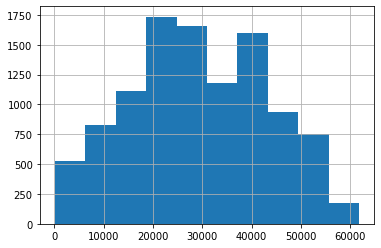

In [49]:
dist_untrs.hist()

In [ ]:
for i,t in untrs.iterrows():
  eud = untrd[untrd.UNI_TR_S == t.COD_ID].distance(t.geometry)
  untrd.eu_dis_trs.loc[eud.index] = eud

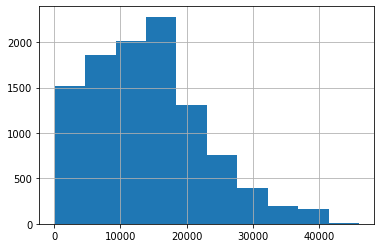

In [116]:
untrd.eu_dis_trs.hist()

### Distancia Euclideana a objectos geograficos personalizados


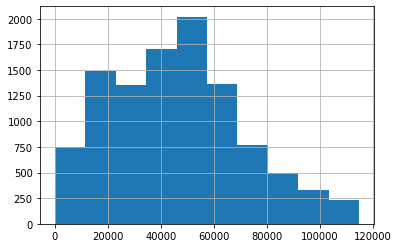

In [123]:
l_costa = LineString([(2019457, 8723094), (1984286, 8670107)])

untrd['dist_mar'] = untrd.distance(l_costa)
untrd.dist_mar.hist()

### Descargar Referencias de OSM

In [126]:
import osmnx as ox

In [181]:
conj_deg = gpd.read_file(data_path, driver='FileGDB', layer='CONJ')
dist = conj_deg.dissolve(by='DIST')

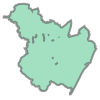

In [191]:
dist.iloc[0].geometry

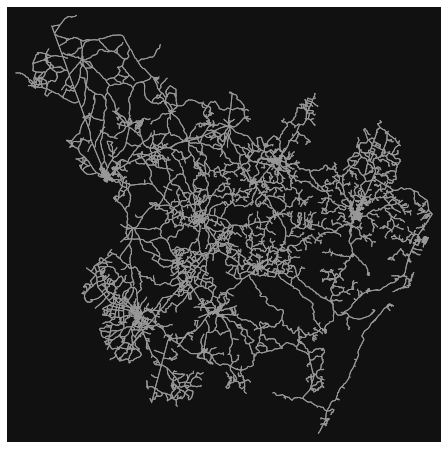

In [192]:
G_conj = ox.graph_from_polygon(dist.iloc[0].geometry)
fig, ax = ox.plot_graph(G_conj, node_size=0)

In [202]:
nodes, edges = ox.graph_to_gdfs(G_conj)

In [ ]:
edges.to_csv('edges_conj.csv')

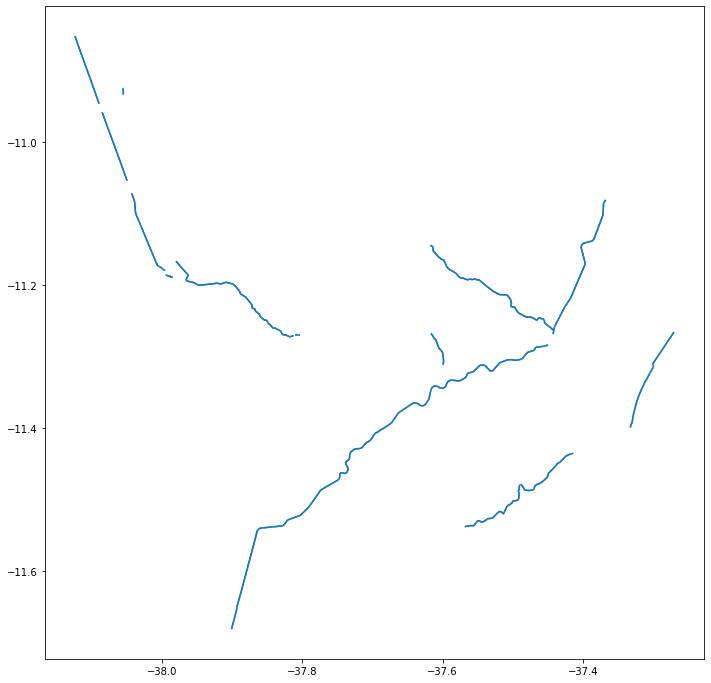

In [216]:
edges[edges.name.str.contains('Rodovia').fillna(False)].plot(figsize=(12,12))

In [231]:
mask = (edges.highway.str.contains('trunk').fillna(False) | edges.highway.str.contains('primary').fillna(False))

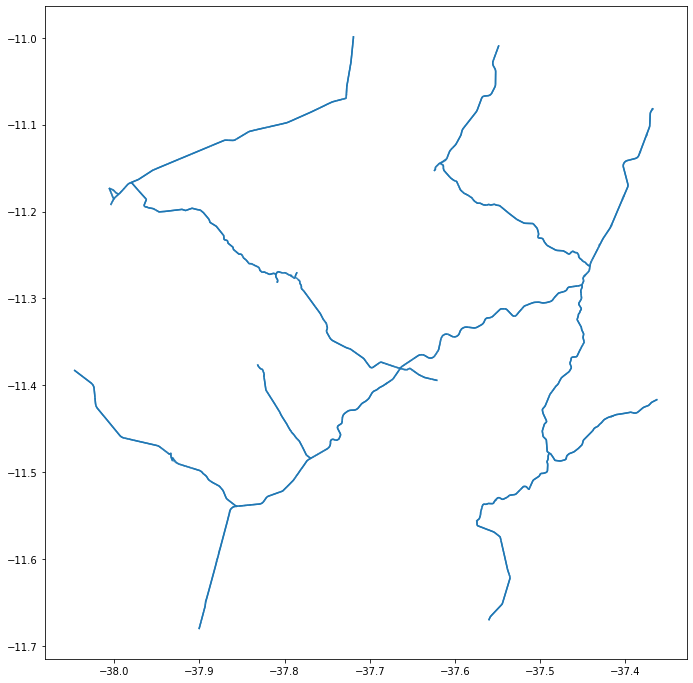

In [237]:
main_roads = edges[['geometry','length','name','ref']][mask]
main_roads.plot(figsize=(12,12))

In [239]:
main_roads['dist'] = 46

In [244]:
main_roads_comb = main_roads.dissolve(by='dist')
main_roads_comb.to_crs(epsg=31982, inplace= True)

In [255]:
untrd['main_r_dist'] = untrd.distance(main_roads_comb.iloc[0].geometry)

In [257]:
untrd.head()

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,POS,ATRB_PER,TEN_LIN_SE,CAP_ELO,CAP_CHA,TAP,CONF,POSTO,POT_NOM,PER_FER,PER_TOT,DAT_CON,CTMT,UNI_TR_S,SUB,CONJ,MUN,BANC,TIP_TRAFO,MRT,DESCR,ARE_LOC,geometry,eu_dis_trs,dist_mar,main_r_dist
0,4_1040341,46,452971,ET4_1040341,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (1950270.638 8743922.604),6186.338859,69162.337971,3969.238913
1,4_1040306,46,452681,ET4_1040306,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,15/03/2011,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (1948936.199 8745414.730),7016.053103,71099.328857,5672.449812
2,7_2070013,46,600021,ET7_2070013,0,ABC,ABCN,0,AT,38,O,2,0.38,5H,1,1.0,RA,PT,112.5,440.0,1990.0,30/09/2010,1_SEITI_1,1_SEITI_1,SEITI,15601,2803005,0,T,0,,UB,POINT (1954060.419 8720300.758),823.431864,52941.328294,2.029119
3,4_1040035,46,462831,ET4_1040035,ET4_1040035,AB,AN,BN,AT,38,PD,1,0.23,1H,1,1.0,RA,PT,15.0,85.0,355.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,MT,0,,NU,POINT (1958367.266 8740739.319),11552.752642,60656.080045,1457.807951
4,13_1130368,46,148261,ET13_1130368,0,ABC,ABCN,0,AT,38,PD,1,0.38,2H,1,1.0,RA,PT,45.0,220.0,1000.0,18/10/2013,1_SETMG_1,2_SETMG_1,SETMG,12743,2917904,0,T,0,,NU,POINT (1951338.207 8686332.312),23661.615281,36726.255363,5615.774855


### Arboles de busqueda espaciales

#### Calculo de densidad

In [258]:
from scipy.spatial import cKDTree

In [260]:
ucbt = gpd.read_file(data_path, driver='FileGDB', layer='UCBT')
ucbt.shape, ssmt.columns

((148801, 40),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

In [261]:
ucbt = ucbt.to_crs(epsg=31982)
ucbt_loc_array = [x.coords[0] for x in ucbt.geometry]
untrd_loc_array = [x.coords[0] for x in untrd.geometry]

In [265]:
radio = 100
tree = cKDTree(ucbt_loc_array)
near_consumers = tree.query_ball_point(untrd_loc_array, radio)

In [269]:
untrd['n_close_con'] = [len(c) for c in near_consumers]
untrd['is_urb'] =  untrd['n_close_con'] > 50

#### Distancia al elemento mas cercano

In [286]:
trd_tree = cKDTree(untrd_loc_array)
d, i = trd_tree.query(untrd_loc_array, k=2, n_jobs=-1)

In [289]:
untrd['closest_trd_i'] = [ti[1] for ti in i]
untrd['closest_trd_dist'] = [td[1] for td in d]

## Generacion de Features a partir de Grafos

En este caso deseamos encontrar el camino a traves de la red electrica desde transformador de distribucion hasta el segmentador.

In [291]:
import networkx as nx

In [297]:
SG = nx.Graph()
SG.add_weighted_edges_from(ssmt[['PN_CON_1','PN_CON_2','COMP']].values.tolist(), weight='length')

In [300]:
# Agrego el COD_ID de cada segmento como atributo de Edge
ID_attr_dict = {tuple((x[0], x[1])): x[2] for x in ssmt[['PN_CON_1','PN_CON_2','COD_ID']].values}
nx.set_edge_attributes(SG, ID_attr_dict, 'SEG_ID')

In [350]:
r = nx.shortest_path_length(SG, '12981', '12988', weight='length')

In [351]:
r

680.5799999999999